### Today's exercise
Gather in the same group as last week, and please go through the following steps:
1. Look back at last week's notebook. If you have not applied any transformation to your input because you did not have time, spend some time thinking about whether it would make sense to do so. You can find relevant transformations in `scikit-learn`: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing. You will probably mostly be interested in `StandardScaler` and `MinMaxScaler`
2. Look at the performance of the models you've fitted last week: what is the best model? Do you see any evidence of overfitting?
3. Fit your maximal models with `Lasso` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) and `Ridge` (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) estimators instead of `LinearRegression`. Make sure you look at the documentation to understand what these do. Fit multiple models with multiple values of alpha and store the outputs;
4. Plot the performance of your models against your linear and KNN models from last week. Does the performance of the model on the validation set improve with regularization?
5. For both `Lasso` and `Ridge` models, plot the value of the coefficients as a function of alpha. You can access the coefficients for a fitted `model` through `model.coef_`. What do you notice in terms of how LASSO versus Ridge behave? (Look at `example.ipynb` for inspiration)
6. Finally, if any models are doing better than the linear model without regularization, select the best `Ridge` and the best `Lasso` model, and plot their coefficients, alongsize coefficients from the simple linear models. How do estimates change with regularization? Which values have changed the most? Do you have any hypothesis as to why?

In [23]:
# Import np, scikit-learn, and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

In [24]:
# Import the bike dataset
df = pd.read_csv('../../data/bike_data/day.csv')

# Set the dteday column as datetime
df['dteday'] = pd.to_datetime(df['dteday'])

# X = df['temp'].values.reshape(-1, 1)
y = df['cnt'].values.reshape(-1, 1)

# Add multiple features
X = df[['temp', 'hum', 'windspeed']].values.reshape(-1, 3)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(y)

<Axes: >

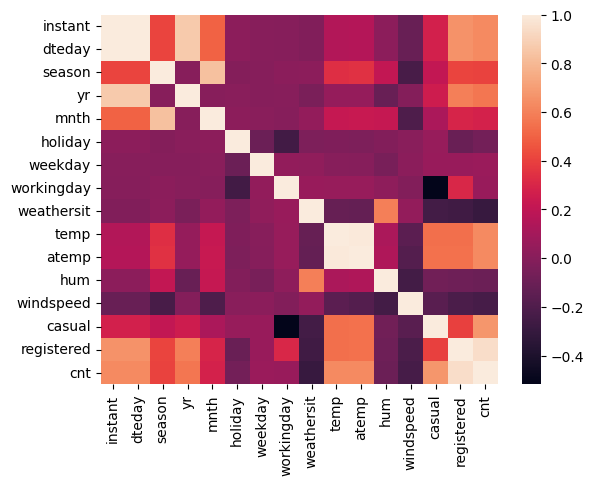

In [25]:
# Plot correlation heatmap
import seaborn as sns
sns.heatmap(df.corr(), annot=False)

In [26]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [27]:
# Splt with scikit-learn
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)


In [28]:
# Run Lasso regression
from sklearn.linear_model import Lasso

# Lasso
lasso_model = Lasso(alpha=0.1)

# Fit the model
lasso_model.fit(X_train, y_train)

# Predict the values
y_pred_lasso = lasso_model.predict(X_val)

In [29]:
# Reshape the y_pred_lasso
y_pred_lasso = y_pred_lasso.reshape(-1, 1)

# Calculate the residuals
residuals_lasso = y_val - y_pred_lasso

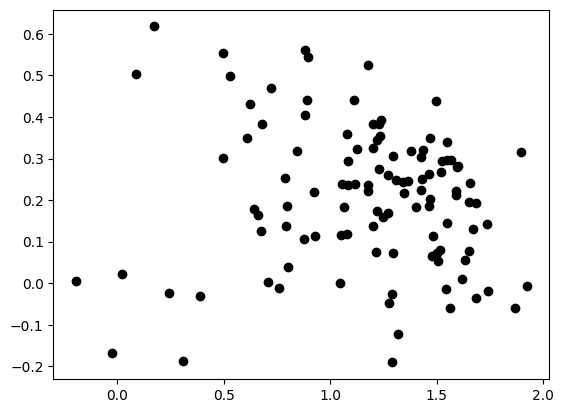

In [30]:
# Plot the predictions
plt.scatter(y_val, y_pred_lasso, color='black')

In [31]:
# Calculate the MSE and ḾAE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE_lasso = mean_squared_error(y_val, y_pred_lasso)
MAE_lasso = mean_absolute_error(y_val, y_pred_lasso)

print('MSE:', MSE_lasso)
print('MAE:', MAE_lasso)

MSE: 1.1533718212507114
MAE: 0.9772464655970525
